# Import and Reading Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [2]:
df1 =pd.read_csv(r'C:\Users\aqsa\Desktop\Diamonds-Train.csv')
        

In [3]:
df2 = pd.read_csv (r'C:\Users\aqsa\Desktop\Diamonds-Test.csv')

In [4]:
df = pd.concat([df1,df2], axis=0)

In [5]:
df.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749.0
1,2,2.25,Fair,1,G,I1,1,7069.0
2,3,0.70,Very Good,3,E,VS2,5,2757.0
3,4,0.47,Good,2,F,VS1,4,1243.0
4,5,0.30,Ideal,5,G,VVS1,7,789.0


In [6]:
df.tail()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
2995,2996,0.72,Ideal,5,F,SI2,2,NaN
2996,2997,1.09,Premium,4,I,VS2,5,NaN
2997,2998,1.05,Very Good,3,G,SI1,3,NaN
2998,2999,0.70,Fair,1,G,SI1,3,NaN
2999,3000,1.01,Very Good,3,F,SI1,3,NaN


# Data Understanding 

# Data Preprocessing

In [7]:
del df['Unnamed: 0']
del df['cut_ord']
del df['clarity_ord']

In [8]:
cat_cols = ['color', 'clarity', 'cut']

In [9]:
for var in cat_cols:
 number = LabelEncoder()
 df[var] = number.fit_transform(df[var].astype('str'))


In [10]:
df.dtypes

carat      float64
cut          int32
color        int32
clarity      int32
price      float64
dtype: object

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [12]:
missing_columns = ['price']

In [13]:
df.isnull().sum()

carat         0
cut           0
color         0
clarity       0
price      3000
dtype: int64

# Impute Missing by Linear Regression Prediction

In [14]:
df.corr()

,carat,cut,color,clarity,price
carat,1.000000,0.016541,0.291453,-0.214533,0.921777
cut,0.016541,1.000000,0.000400,0.028383,0.038232
color,0.291453,0.000400,1.000000,-0.027574,0.174110
clarity,-0.214533,0.028383,-0.027574,1.000000,-0.072782
price,0.921777,0.038232,0.174110,-0.072782,1.000000


<AxesSubplot:title={'center':'carat VS price'}, xlabel='carat', ylabel='price'>

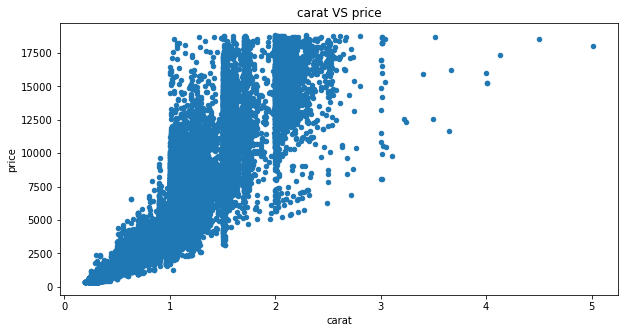

In [15]:
df.plot.scatter(x='carat', y='price', figsize=(10,5), title="carat"+" VS "+ 'price')

<AxesSubplot:title={'center':'color VS price'}, xlabel='color', ylabel='price'>

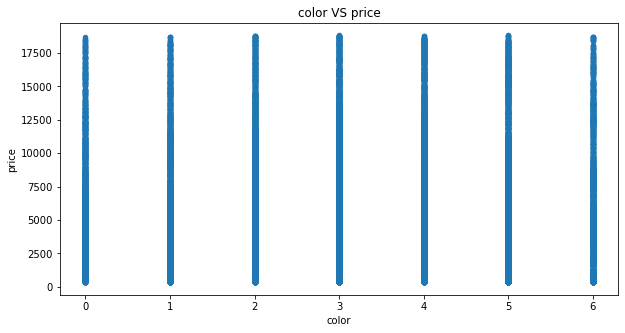

In [16]:
df.plot.scatter(x="color", y='price', figsize=(10,5), title="color"+" VS "+ 'price')

<AxesSubplot:title={'center':'clarity VS price'}, xlabel='clarity', ylabel='price'>

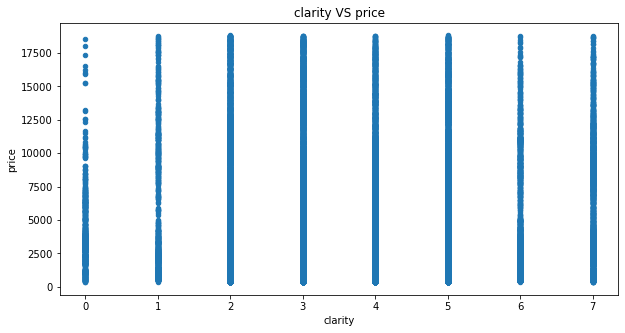

In [17]:
df.plot.scatter(x="clarity", y='price', figsize=(10,5), title="clarity"+" VS "+ 'price')

<AxesSubplot:title={'center':'cut VS price'}, xlabel='cut', ylabel='price'>

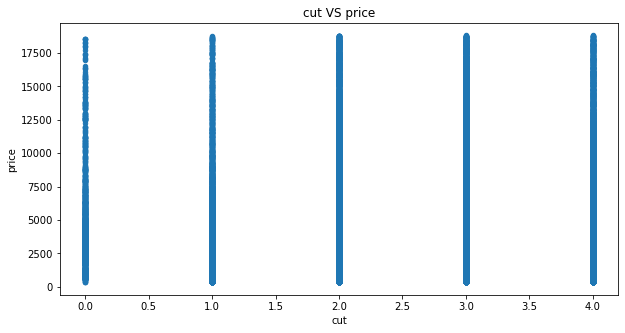

In [18]:
df.plot.scatter(x="cut", y='price', figsize=(10,5), title="cut"+" VS "+ 'price')

In [19]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [20]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [21]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = df[feature + "_imp"]
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    


In [22]:
model = linear_model.LinearRegression()
model.fit(X = df[parameters], y = df[feature + '_imp'])

LinearRegression()

In [23]:
 deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

In [24]:
df.tail()

,carat,cut,color,clarity,price,price_imp
2995,0.72,2,2,3,NaN,935.0
2996,1.09,3,5,5,NaN,738.0
2997,1.05,4,3,2,NaN,645.0
2998,0.70,0,3,2,NaN,726.0
2999,1.01,4,2,2,NaN,4334.0


In [25]:
del df ['price']

In [28]:
df.tail(30)

,carat,cut,color,clarity,price_imp
2970,1.00,3,2,5,1865.0
2971,1.07,3,1,3,1814.0
2972,1.21,4,2,4,4560.0
2973,0.46,0,3,4,1080.0
2974,0.79,1,5,5,626.0
2975,0.32,2,2,7,3276.0
2976,0.40,2,2,5,1746.0
2977,0.51,0,1,5,2333.0
2978,1.05,3,6,4,700.0
2979,0.43,4,4,2,4623.0


In [29]:
df.head(30)

,carat,cut,color,clarity,price_imp
0,0.51,3,2,4,1749.0
1,2.25,0,3,0,7069.0
2,0.70,4,1,5,2757.0
3,0.47,1,2,4,1243.0
4,0.30,2,3,6,789.0
5,0.33,2,0,2,728.0
6,2.01,4,3,2,18398.0
7,0.51,2,2,7,2203.0
8,1.70,3,0,2,15100.0
9,0.53,3,0,5,1857.0
